In [9]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
# %matplotlib inline
import time
import seaborn as sns
import math
from scipy.spatial.distance import euclidean, chebyshev, cityblock
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, MaxAbsScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import unidecode
from unidecode import unidecode
import requests
import pandas as pd
import datetime
# %matplotlib inline
from dateutil.parser import parse
# from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome()
driver.get('https://www.google.com/flights/explore/')
time.sleep(6)

def scrape_data(start_date, from_place, to_place, city_name):
    to_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[3]/div/div[4]/div/div')
    to_input.click()
    to_action = ActionChains(driver)
    to_action.send_keys(to_place)
    to_action.send_keys(Keys.ENTER)
    to_action.perform()
    
    from_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[3]/div/div[2]/div/div')
    from_input.click()
    from_action = ActionChains(driver)
    from_action.send_keys(from_place)
    from_action.send_keys(Keys.ENTER)
    from_action.perform() 
    
    time.sleep(5)
    current_url = driver.current_url
    split_url = current_url.split('2017')
    new_url = split_url[0] + start_date
    driver.get(new_url)    
    
    time.sleep(5)
    results = driver.find_elements_by_class_name('LJTSM3-v-c')
    

    result_names = []
    for i in range(len(results)):
        result_names.append(results[i].text)

    cities = []
    for city in result_names:
        name = city.split(',')
        cities.append(unidecode(name[0]))
    
    lower_case = [x.lower() for x in cities]
    if city_name.lower() in lower_case:
        city_index = lower_case.index(city_name.lower())
    
    time.sleep(2)
    
    box_class = driver.find_elements_by_class_name("LJTSM3-v-m")
    test = box_class[city_index]
    bars = test.find_elements_by_class_name('LJTSM3-w-x')

    time.sleep(1)

    data = []

    for bar in bars:
        ActionChains(driver).move_to_element(bar).perform()
        time.sleep(0.00001)
        data.append((test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[0].text,
           test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[1].text))

    time.sleep(2)

    d = data[0]
    clean_data = [(float(d[0].replace('$', '').replace(',', '')), (parse(d[1].split('-')[0].strip()) - datetime.datetime(2017,4,4,0,0)).days)
                      for d in data]

    time.sleep(3)

    df = pd.DataFrame(clean_data, columns=['Price','Start_Date'])
    return df

df = scrape_data('2017-04-16','New York','United States','Miami')
print df

def scrape_data_90(start_date, from_place, to_place, city_name):
    
    to_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[3]/div/div[4]/div/div')
    to_input.click()
    to_action = ActionChains(driver)
    to_action.send_keys(to_place)
    to_action.send_keys(Keys.ENTER)
    to_action.perform()
    
    from_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[3]/div/div[2]/div/div')
    from_input.click()
    from_action = ActionChains(driver)
    from_action.send_keys(from_place)
    from_action.send_keys(Keys.ENTER)
    from_action.perform() 
    
    time.sleep(5)
    current_url = driver.current_url
    split_url = current_url.split('2017')
    new_url = split_url[0] + start_date
    driver.get(new_url)    
    
    time.sleep(5)
    results = driver.find_elements_by_class_name('LJTSM3-v-c')
    

    result_names = []
    for i in range(len(results)):
        result_names.append(results[i].text)

    cities = []
    for city in result_names:
        name = city.split(',')
        cities.append(unidecode(name[0]))
    
    lower_case = [x.lower() for x in cities]
    if city_name.lower() in lower_case:
        city_index = lower_case.index(city_name.lower())
    
    time.sleep(2)
    
    box_class = driver.find_elements_by_class_name("LJTSM3-v-m")
    test = box_class[city_index]
    bars = test.find_elements_by_class_name('LJTSM3-w-x')

    time.sleep(1)
    data_90 = []

    for bar in bars:
        ActionChains(driver).move_to_element(bar).perform()
        time.sleep(0.00001)
        data_90.append((test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[0].text,
           test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[1].text))
    
    move_bars_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[4]/div/div[2]/div[1]/div/div[2]/div[2]/div/div[2]/div[5]')
    move_bars_input.click()
    move_bars_input = ActionChains(driver)
    move_bars_input.perform()
    
    time.sleep(5)
    results = driver.find_elements_by_class_name('LJTSM3-v-c')
    result_names = []
    for i in range(len(results)):
        result_names.append(results[i].text)

    cities = []
    for city in result_names:
        name = city.split(',')
        cities.append(unidecode(name[0]))
        
    lower_case = [x.lower() for x in cities]
    if city_name.lower() in lower_case:
        city_index = lower_case.index(city_name.lower())
        
    time.sleep(2)
        
    box_class = driver.find_elements_by_class_name("LJTSM3-v-m")
    test = box_class[city_index]
    bars = test.find_elements_by_class_name('LJTSM3-w-x')
    
    next_data= []
    for bar in bars:
        ActionChains(driver).move_to_element(bar).perform()
        time.sleep(0.00001)
        next_data.append((test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[0].text,
           test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[1].text))
    
    time.sleep(3)
    for element in next_data:
        if element not in data_90:
            data_90.append(element)
            
    d = data_90[0]
    clean_data = [(float(d[0].replace('$', '').replace(',', '')), (parse(d[1].split('-')[0].strip()) - datetime.datetime(2017,4,4,0,0)).days)
                      for d in data_90]
    
    df_90 = pd.DataFrame(clean_data, columns=['Price','Start_Date'])
    return df_90   
    
df_90 = scrape_data_90('2017-04-20','London','Europe','Dublin')
print 90

px = [x for x in df['Price']]
ff = pd.DataFrame(px, columns=['Price_of_flight']).reset_index()



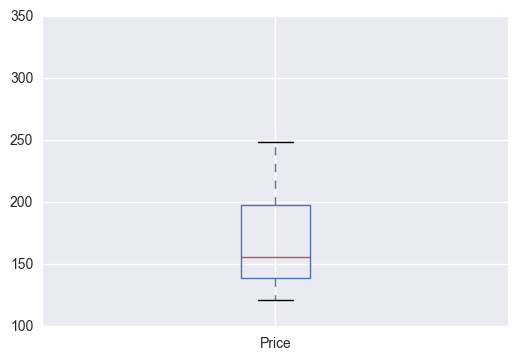

In [12]:
df['Price'].plot.box()

In [13]:
import numpy as np

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [14]:
outliers_iqr(df['Price'])

(array([ 0,  1, 39, 40], dtype=int64),)

In [17]:
# q1 = df['Price'].quantile(.25)
# q2 = df['Price'].quantile(.75)
# mask = df['Price'].between(q1, q2, inclusive=True)
# iqr = df.loc[mask, 'Price']
# iqr

In [19]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
# IQR = Q3 - Q1
Q1

# #Values between Q1-1.5IQR and Q3+1.5IQR
# filtered = df.query('(@Q1 - 1.5 * @IQR) <= nb <= (@Q3 + 1.5 * @IQR)')

# print(filtered.head())
# #     nb

138.75

TypeError: float() argument must be a string or a number

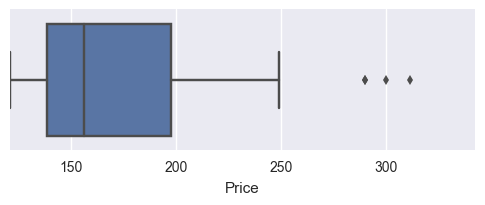

In [20]:
i = 'Price'
 
# plt.figure(figsize=(10,8))
# plt.subplot(211)
# plt.xlim(df[i].min(), df[i].max()*1.1)
# plt.axvline(x=min)
# plt.axvline(x=max)
 
ax = df[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])
plt.axvline(x=min)
plt.axvline(x=max)

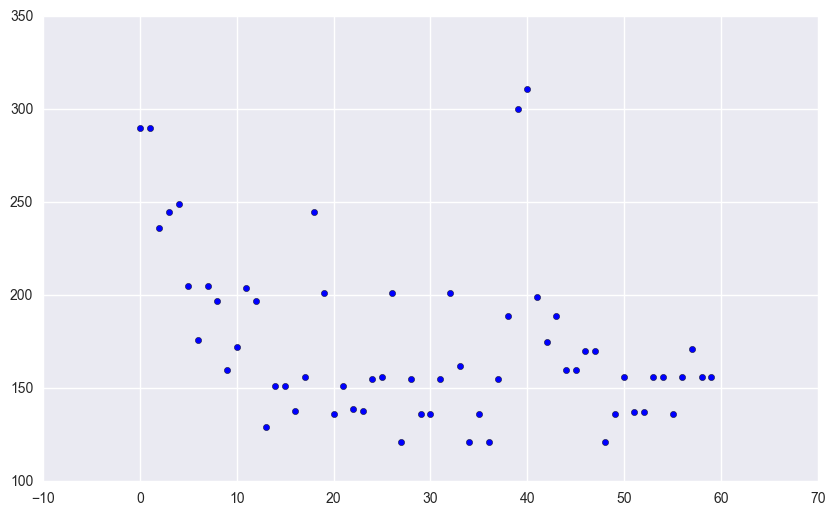

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(np.arange(len(df['Price'])), df['Price'])

In [22]:
px = [x for x in df['Price']]
ff = pd.DataFrame(px, columns=['Price_of_flight']).reset_index()

Cluster labels: [-1  0  1  2  3  4]
Cluster Means: [array([ 0.11299435,  0.42807018]), array([ 0.25988701,  0.16666667]), array([ 0.36723164,  0.0877193 ]), array([ 0.85875706,  0.08245614]), array([ 0.94915254,  0.18421053])]
290.0
290.0
236.0
245.0
249.0
176.0
160.0
172.0
204.0
197.0
129.0
138.0
245.0
201.0
151.0
155.0
156.0
201.0
121.0
155.0
136.0
136.0
155.0
201.0
162.0
121.0
136.0
121.0
155.0
189.0
300.0
311.0
199.0
175.0
189.0
160.0
160.0
170.0
170.0
121.0
156.0
136.0
171.0


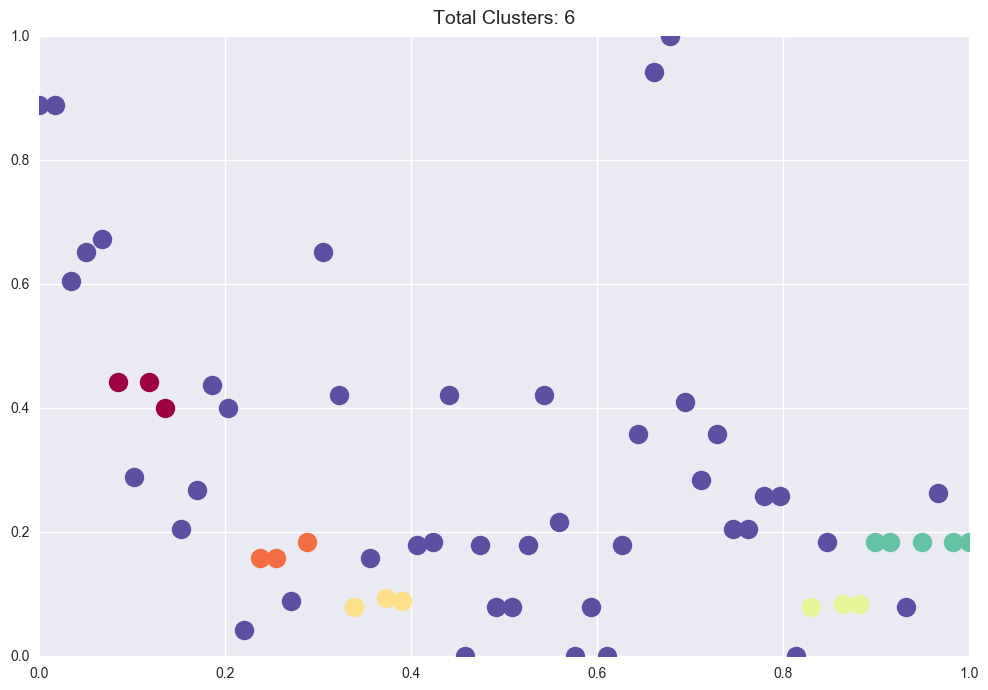

In [32]:
X = MinMaxScaler().fit_transform(ff) 
db = DBSCAN(eps = 0.05, min_samples = 3).fit(X)

labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.subplots(figsize = (12,8))

for k,c in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor = c, markeredgecolor = 'k',markersize = 14)
    
    
plt.title('Total Clusters: {}'.format(clusters), fontsize = 14, y = 1.01) 

def calculate_cluster_means(X, labels):
    lbls = np.unique(labels)
    print "Cluster labels: {}".format(np.unique(lbls))

    cluster_means = [np.mean(X[labels==num, :], axis=0) for num in range(lbls[-1] + 1)]
    print "Cluster Means: {}".format(cluster_means)
    return cluster_means

# Getting outliers and their indexes in dataframe
out_ind = []
for ind,y in enumerate(X):
    if labels[ind]== -1:
        out_ind.append([ind,y])
# out_ind

# Cluster means
cluster_means = calculate_cluster_means(X, labels)

# Outliers
class_member_mask = (labels == -1) 
outs = X[class_member_mask] 
# outs


# Finding closest cluster for each outlier
chosen_list = []

for out_index,out in enumerate(outs):    
    min_list = []
    for index,cm in enumerate(cluster_means):         
        min_list.append(euclidean(cm, out))

    for inx,abc in enumerate(min_list):
        if abc == sorted(min_list)[0]:
            chosen_list.append([out_index,inx])


for i,abc in enumerate(out_ind):
    print df['Price'][abc[0]]
# for chosen in chosen_list:
#     outlier_cods = 

In [33]:
#Cluster one 
def calculate_cluster_means(X, labels):
    lbls = np.unique(labels)
    print "Cluster labels: {}".format(np.unique(lbls))

    cluster_means = [np.mean(X[labels==num, :], axis=0) for num in range(lbls[-1] + 1)]
    print "Cluster Means: {}".format(cluster_means)
    return cluster_means

# Cluster means
cluster_means = calculate_cluster_means(X, labels)

# Getting cluster 1 and their indexes in dataframe
c1_ind = []
for ind,y in enumerate(X):
    if labels[ind]== 0:
        c1_ind.append([ind,y])
# c1_ind

# Cluster 1
class_member_mask_c1 = (labels == 0) 
c1 = X[class_member_mask_c1] 


print c1_ind

cluster_one_prices=[]

for i,abc in enumerate(c1_ind):
    cluster_one_prices.append(df['Price'][abc[0]])
    
print cluster_one_prices
# cluster_one_prices_mean =  reduce(lambda x, y: x + y, cluster_one_prices) / len(cluster_one_prices)
# print cluster_one_prices_mean

def mean(data):
    """Return the sample arithmetic mean of data."""
    n = len(data)
    if n < 1:
        raise ValueError('mean requires at least one data point')
    return sum(data)/n # in Python 2 use sum(data)/float(n)

def _ss(data):
    """Return sum of square deviations of sequence data."""
    c = mean(data)
    ss = sum((x-c)**2 for x in data)
    return ss

def pstdev(data):
    """Calculates the population standard deviation."""
    n = len(data)
    if n < 2:
        raise ValueError('variance requires at least two data points')
    ss = _ss(data)
    pvar = ss/n # the population variance
    return pvar**0.5
print mean(cluster_one_prices)
print _ss(cluster_one_prices)
pstdev(cluster_one_prices)

Cluster labels: [-1  0  1  2  3  4]
Cluster Means: [array([ 0.11299435,  0.42807018]), array([ 0.25988701,  0.16666667]), array([ 0.36723164,  0.0877193 ]), array([ 0.85875706,  0.08245614]), array([ 0.94915254,  0.18421053])]
[[5, array([ 0.08474576,  0.44210526])], [7, array([ 0.11864407,  0.44210526])], [8, array([ 0.13559322,  0.4       ])]]
[205.0, 205.0, 197.0]
202.333333333
42.6666666667


3.7712361663282534

In [34]:
# Getting cluster 2 and their indexes in dataframe
c2_ind = []
for ind,y in enumerate(X):
    if labels[ind]== 1:
        c2_ind.append([ind,y])
# c2_ind

# Cluster 2
class_member_mask_c2 = (labels == 1) 
c2 = X[class_member_mask_c2] 


print c2_ind

cluster_two_prices=[]

for i,abc in enumerate(c2_ind):
    cluster_two_prices.append(df['Price'][abc[0]])
    
print cluster_two_prices
# cluster_two_prices_mean =  reduce(lambda x, y: x + y, cluster_one_prices) / len(cluster_one_prices)
# print cluster_two_prices_mean

def mean(data):
    """Return the sample arithmetic mean of data."""
    n = len(data)
    if n < 1:
        raise ValueError('mean requires at least one data point')
    return sum(data)/n # in Python 2 use sum(data)/float(n)

def _ss(data):
    """Return sum of square deviations of sequence data."""
    c = mean(data)
    ss = sum((x-c)**2 for x in data)
    return ss

def pstdev(data):
    """Calculates the population standard deviation."""
    n = len(data)
    if n < 2:
        raise ValueError('variance requires at least two data points')
    ss = _ss(data)
    pvar = ss/n # the population variance
    return pvar**0.5

print mean(cluster_two_prices)
print _ss(cluster_two_prices)
pstdev(cluster_two_prices)

[[14, array([ 0.23728814,  0.15789474])], [15, array([ 0.25423729,  0.15789474])], [17, array([ 0.28813559,  0.18421053])]]
[151.0, 151.0, 156.0]
152.666666667
16.6666666667


2.3570226039551585

In [35]:
# Getting cluster 3 and their indexes in dataframe
c3_ind = []
for ind,y in enumerate(X):
    if labels[ind]== 2:
        c3_ind.append([ind,y])
# c3_ind

# Cluster 3
class_member_mask_c3 = (labels == 2) 
c3 = X[class_member_mask_c3] 


print c3_ind

cluster_three_prices=[]

for i,abc in enumerate(c3_ind):
    cluster_three_prices.append(df['Price'][abc[0]])
    
print cluster_three_prices
# cluster_two_prices_mean =  reduce(lambda x, y: x + y, cluster_one_prices) / len(cluster_one_prices)
# print cluster_two_prices_mean

def mean(data):
    """Return the sample arithmetic mean of data."""
    n = len(data)
    if n < 1:
        raise ValueError('mean requires at least one data point')
    return sum(data)/n # in Python 2 use sum(data)/float(n)

def _ss(data):
    """Return sum of square deviations of sequence data."""
    c = mean(data)
    ss = sum((x-c)**2 for x in data)
    return ss

def pstdev(data):
    """Calculates the population standard deviation."""
    n = len(data)
    if n < 2:
        raise ValueError('variance requires at least two data points')
    ss = _ss(data)
    pvar = ss/n # the population variance
    return pvar**0.5

print mean(cluster_three_prices)
print _ss(cluster_three_prices)
pstdev(cluster_three_prices)

[[20, array([ 0.33898305,  0.07894737])], [22, array([ 0.37288136,  0.09473684])], [23, array([ 0.38983051,  0.08947368])]]
[136.0, 139.0, 138.0]
137.666666667
4.66666666667


1.2472191289246473

In [36]:
# Getting cluster 4 and their indexes in dataframe
c4_ind = []
for ind,y in enumerate(X):
    if labels[ind]== 3:
        c4_ind.append([ind,y])
# c3_ind

# Cluster 3
class_member_mask_c4 = (labels == 4) 
c4 = X[class_member_mask_c4] 


print c4_ind

cluster_four_prices=[]

for i,abc in enumerate(c4_ind):
    cluster_four_prices.append(df['Price'][abc[0]])
    
print cluster_four_prices
# cluster_two_prices_mean =  reduce(lambda x, y: x + y, cluster_one_prices) / len(cluster_one_prices)
# print cluster_two_prices_mean

def mean(data):
    """Return the sample arithmetic mean of data."""
    n = len(data)
    if n < 1:
        raise ValueError('mean requires at least one data point')
    return sum(data)/n # in Python 2 use sum(data)/float(n)

def _ss(data):
    """Return sum of square deviations of sequence data."""
    c = mean(data)
    ss = sum((x-c)**2 for x in data)
    return ss

def pstdev(data):
    """Calculates the population standard deviation."""
    n = len(data)
    if n < 2:
        raise ValueError('variance requires at least two data points')
    ss = _ss(data)
    pvar = ss/n # the population variance
    return pvar**0.5

print mean(cluster_four_prices)
print _ss(cluster_four_prices)
pstdev(cluster_four_prices)

[[49, array([ 0.83050847,  0.07894737])], [51, array([ 0.86440678,  0.08421053])], [52, array([ 0.88135593,  0.08421053])]]
[136.0, 137.0, 137.0]
136.666666667
0.666666666667


0.47140452079103168

In [37]:
# Getting cluster 5 and their indexes in dataframe
c5_ind = []
for ind,y in enumerate(X):
    if labels[ind]== 4:
        c5_ind.append([ind,y])
# c5_ind

# Cluster 5
class_member_mask_c5 = (labels == 4) 
c5 = X[class_member_mask_c5] 


print c5_ind

cluster_five_prices=[]

for i,abc in enumerate(c5_ind):
    cluster_five_prices.append(df['Price'][abc[0]])
    
print cluster_five_prices
# cluster_two_prices_mean =  reduce(lambda x, y: x + y, cluster_one_prices) / len(cluster_one_prices)
# print cluster_two_prices_mean

def mean(data):
    """Return the sample arithmetic mean of data."""
    n = len(data)
    if n < 1:
        raise ValueError('mean requires at least one data point')
    return sum(data)/n # in Python 2 use sum(data)/float(n)

def _ss(data):
    """Return sum of square deviations of sequence data."""
    c = mean(data)
    ss = sum((x-c)**2 for x in data)
    return ss

def pstdev(data):
    """Calculates the population standard deviation."""
    n = len(data)
    if n < 2:
        raise ValueError('variance requires at least two data points')
    ss = _ss(data)
    pvar = ss/n # the population variance
    return pvar**0.5

print mean(cluster_five_prices)
print _ss(cluster_five_prices)
pstdev(cluster_five_prices)

[[53, array([ 0.89830508,  0.18421053])], [54, array([ 0.91525424,  0.18421053])], [56, array([ 0.94915254,  0.18421053])], [58, array([ 0.98305085,  0.18421053])], [59, array([ 1.        ,  0.18421053])]]
[156.0, 156.0, 156.0, 156.0, 156.0]
156.0
0.0


0.0